# Instacart Order Analysis

### Group Members:
    Syed Zarif
    Muhammad Faris
    Athirah Zahidah

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt            
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
orders = pd.read_csv('orders.csv')
aisles = pd.read_csv('aisles.csv')
dept = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
order_product_prior = pd.read_csv('order_products__prior.csv')
order_product_train = pd.read_csv('order_products__train.csv')

# Exploratory Data Analysis

In [3]:
order_product_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [4]:
# Checking the data type
order_product_train.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [5]:
# Total number of rows and columns
order_product_train.shape

(1384617, 4)

In [6]:
#Check total null 
print(order_product_train.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [7]:
print (len(order_product_train['order_id'].unique()))
print (len(order_product_train['product_id'].unique()))

order_product_train.count()

131209
39123


order_id             1384617
product_id           1384617
add_to_cart_order    1384617
reordered            1384617
dtype: int64

In [8]:
order_product_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [9]:
# Checking the data type
order_product_prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [10]:
# Total number of rows and columns
order_product_prior.shape

(32434489, 4)

In [11]:
#Check total null 
print(order_product_prior.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [12]:
print (len(order_product_train['order_id'].unique()))
print (len(order_product_train['product_id'].unique()))

order_product_prior.count()

131209
39123


order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
dtype: int64

In [13]:
#Check the duplicate rows in order_product_prio
duplicate_rows_df = order_product_prior[order_product_prior.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [107]:
#Check the duplicate rows order_product_train
duplicate_rows_df = order_product_train[order_product_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


## Average of products were reordered from prior and train dataset

In [14]:
order_product_prior.reordered.sum() / order_product_prior.reordered.count()

0.5896974667922161

In [15]:
order_product_train.reordered.sum() / order_product_train.reordered.count()

0.5985944127509629

In [16]:
order_product_train['reordered'].value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

In [17]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
print (orders['eval_set'].unique())
orders.count()

['prior' 'train' 'test']


order_id                  3421083
user_id                   3421083
eval_set                  3421083
order_number              3421083
order_dow                 3421083
order_hour_of_day         3421083
days_since_prior_order    3214874
dtype: int64

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


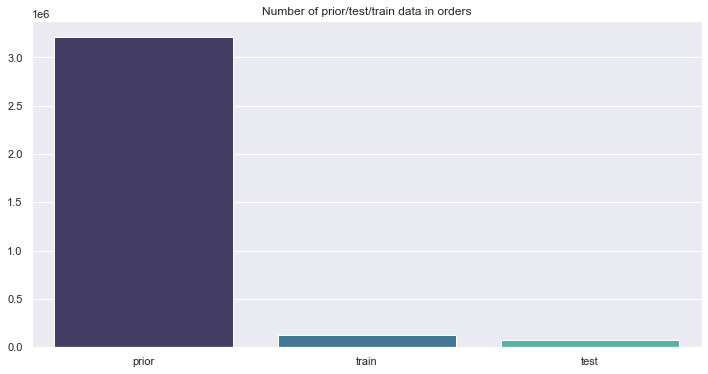

In [19]:
#Total data sets in order
count = orders['eval_set'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values,palette="mako")
plt.title('Number of prior/test/train data in orders', fontsize=12)
plt.show()

In [20]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

## Hour Of Day People Generally Order ##

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Frequency of orders by hours of the day')

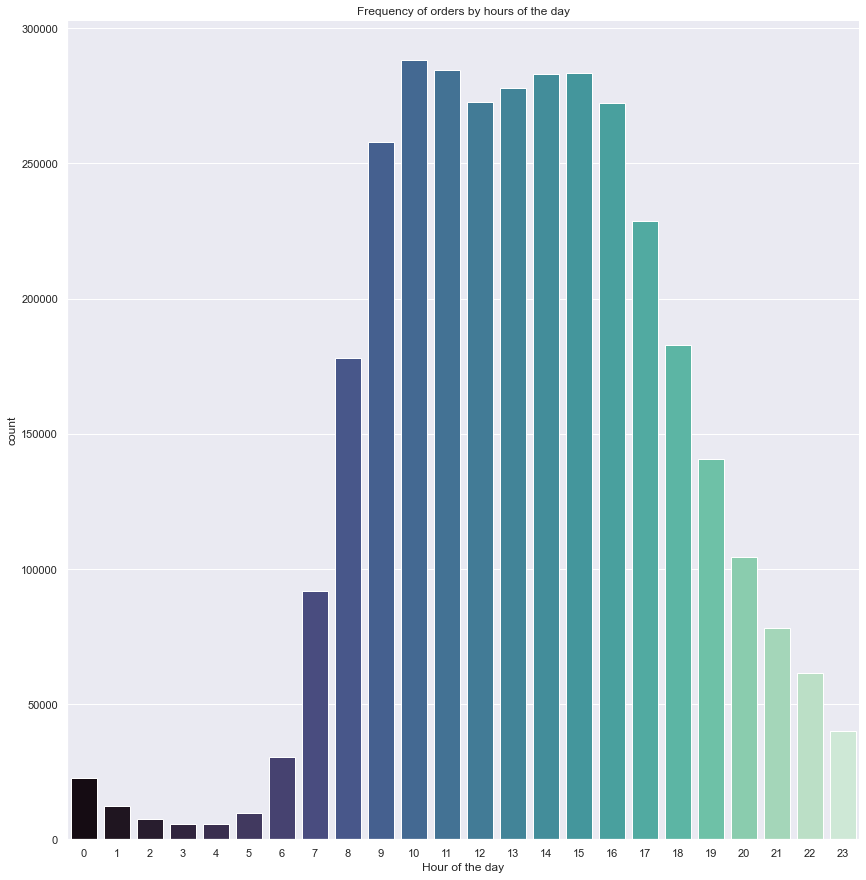

In [108]:
#plot bar graph for hour of day people order from 12am to 11pm
x = orders['order_hour_of_day'].index
sns.factorplot(x=x, data=orders['order_hour_of_day'], kind="count",palette="mako", size=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.title('Frequency of orders by hours of the day')

Assumptions:
The most frequent order time by the user is between 10am to 3pm. 

Shortcomings:
Since we use only order dataset, there are a few limitation for us to do analysis to solve our objective.


Next Step:
We will use other dataset in order to do further analysis to achieve our objective.

## Day Of The Week People Order ##

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Frequency of orders by week')

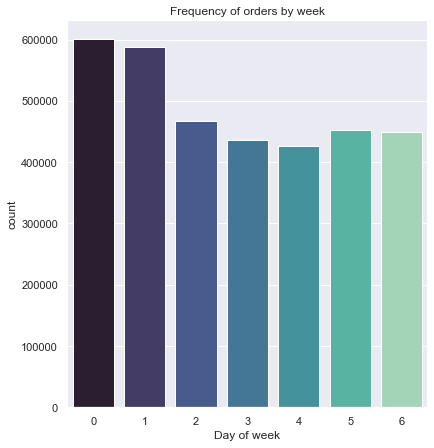

In [22]:
g = sns.factorplot(x=orders['order_dow'].index, data=orders['order_dow'], kind="count",palette="mako", size=6)
plt.xlabel('Day of week', fontsize=12)
plt.title('Frequency of orders by week')

## The ideal hour and day of the purchase ##

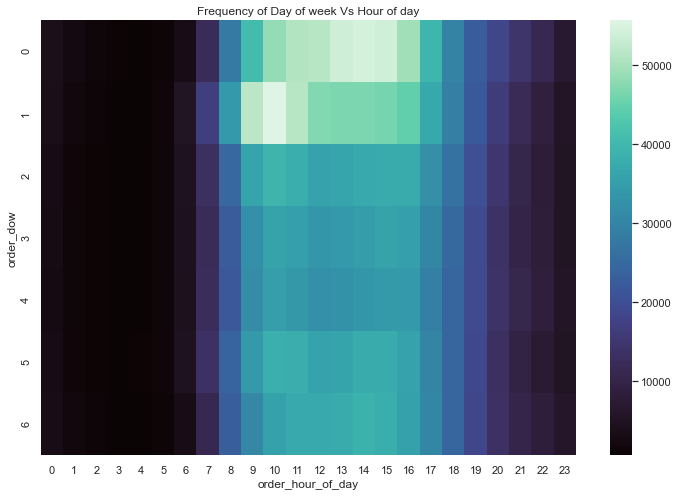

In [23]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df, cmap="mako" )
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

 ##  Orders that users generally made ##
So there are no orders less than 4 and is max capped at 100 as given in the data page.

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


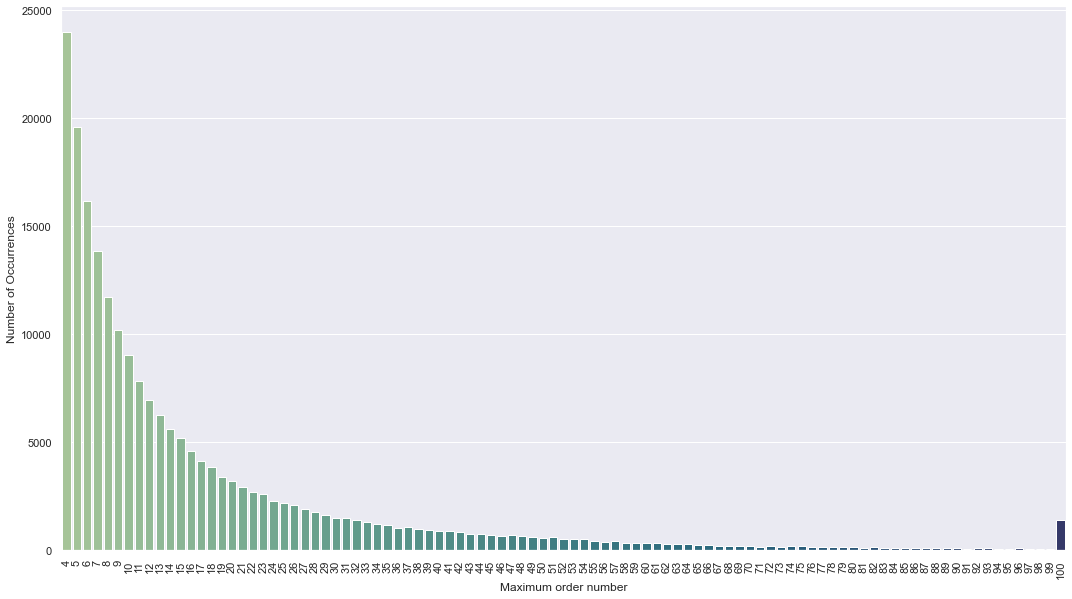

In [24]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(18,10))
sns.barplot(cnt_srs.index, cnt_srs.values, palette="crest")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Total count for reorder after last purchase

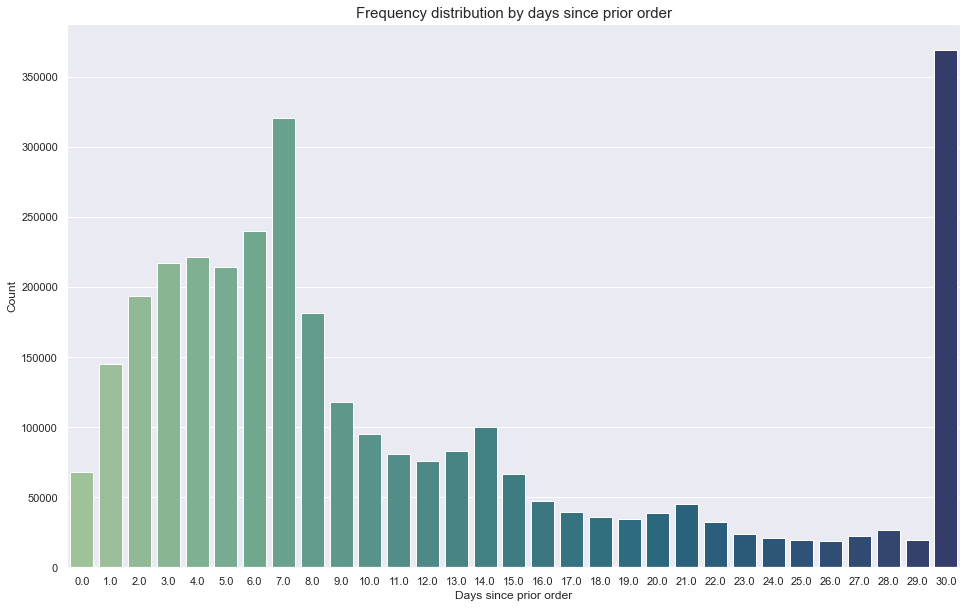

In [25]:
plt.figure(figsize=(16,10))
sns.countplot(x="days_since_prior_order", data=orders, palette="crest")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

## Items that people put into the cart first

In [26]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [27]:
print (len(products['product_name'].unique()))
products.count()

49688


product_id       49688
product_name     49688
aisle_id         49688
department_id    49688
dtype: int64

In [28]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [29]:
aisles.count()

aisle_id    134
aisle       134
dtype: int64

In [30]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [31]:
print ('Total items:', dept.count())
print ('Unique items:', dept['department'].unique())

Total items: department_id    21
department       21
dtype: int64
Unique items: ['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']


In [32]:
order_product_prior.shape

(32434489, 4)

In [33]:
order_product_prior.reordered.sum()

19126536

In [34]:
order_product_prior.reordered.count()

32434489

## Merging data
Merge the products, departments and aisles columns

In [35]:
order_product_prior = pd.merge(order_product_prior, products, on='product_id', how='left')

order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [36]:
order_product_prior = pd.merge(order_product_prior, aisles, on='aisle_id', how='left')
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [37]:
order_product_prior = pd.merge(order_product_prior, dept, on='department_id', how='left')
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


## Best Selling Products

In [38]:
products.shape

(49688, 4)

In [39]:
cnt_srs = order_product_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## Lowest Selling Products

In [109]:
cnt_srs = order_product_prior['product_name'].value_counts().reset_index().tail(1000)

cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.sort_values(by='frequency_count', ascending=False) 
cnt_srs

,product_name,frequency_count
48677,Crystalized Ginger,3
48678,All-Surface Cleaner,3
48679,Ocean Sea Salt Pumpkin Seeds,3
48680,Sensitive Skin Experts Micellar Cleansing Oil,3
48681,Men Hair & Body Wash,3
...,...,...
49672,Master Blend Coffee,1
49673,Cabernet Sauvignon 2015,1
49674,Brut Prosecco,1
49675,Original Jerky,1


## Most popular products in Aisle

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


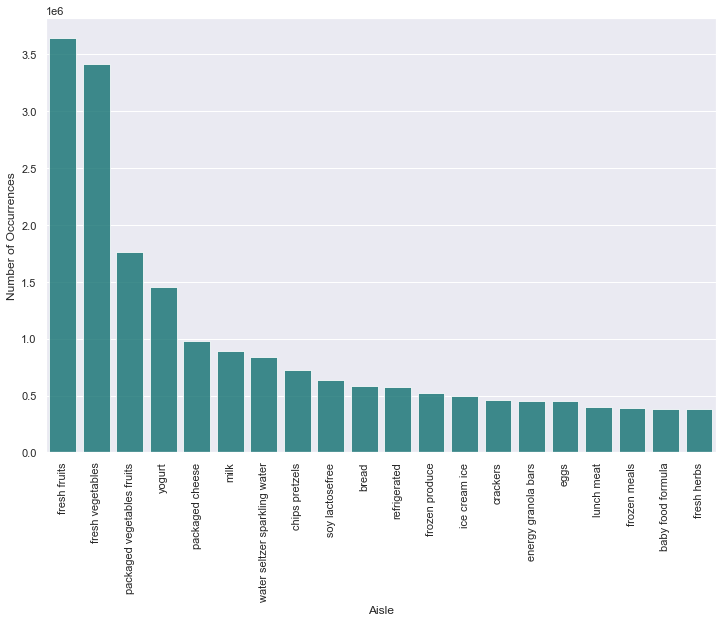

In [41]:
cnt_srs = order_product_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='#008080')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Most popular products in Department

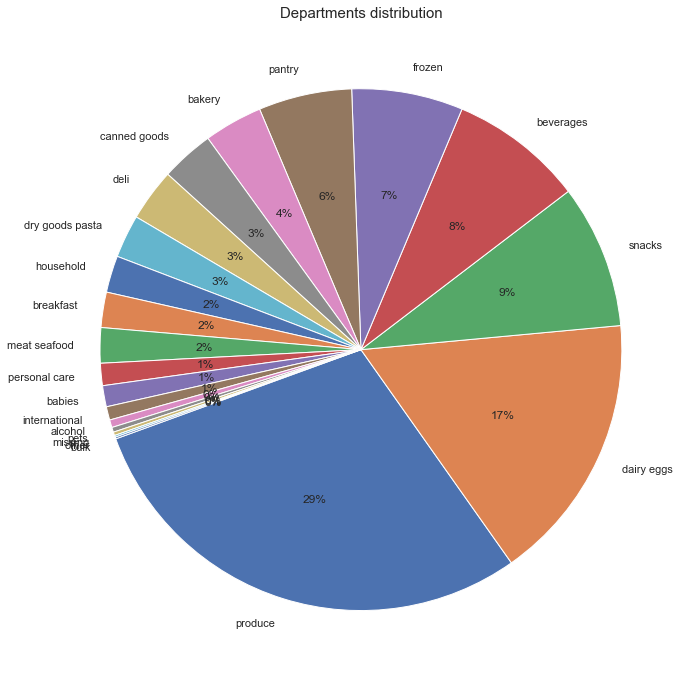

In [42]:
plt.figure(figsize=(12,12))
temp_series = order_product_prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

#### Produce is the largest department.

## Reordered Products - Department

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


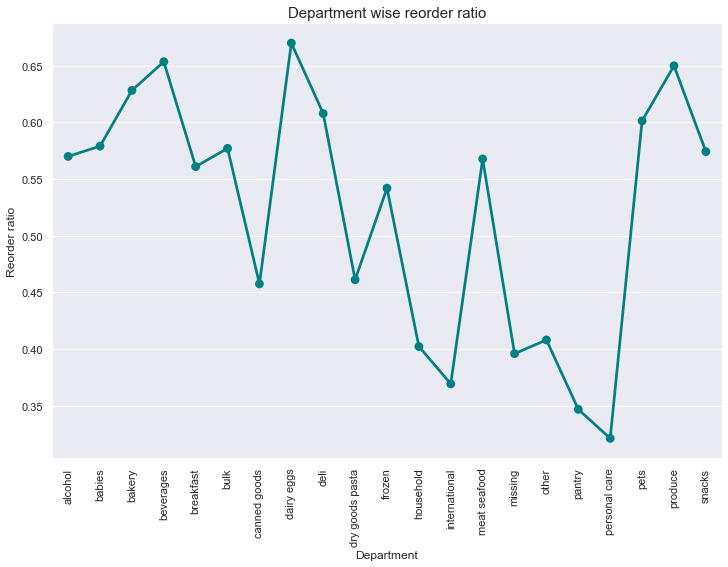

In [43]:
grouped_df = order_product_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color='#008080')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#### Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

## Reorder - per Day

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


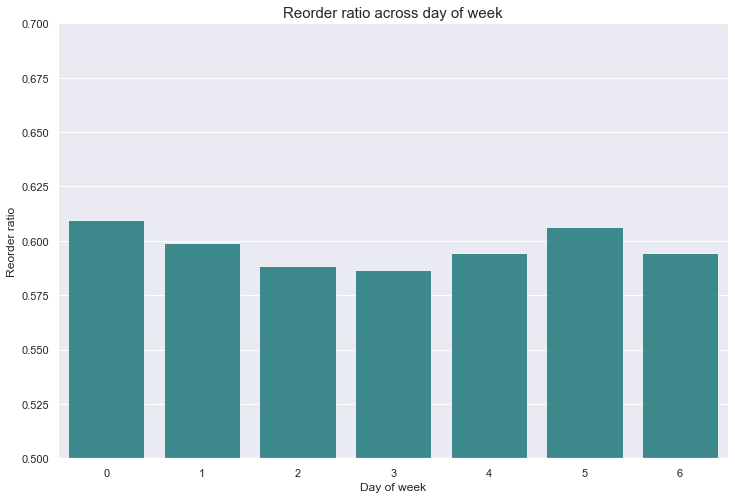

In [45]:
order_product_train = pd.merge(order_product_train, orders, on='order_id', how='left')
grouped_df = order_product_train.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color='#008080')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.ylim(0.5, 0.7)
plt.show()

## Reorder - per Hour

C:\Users\sydzr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


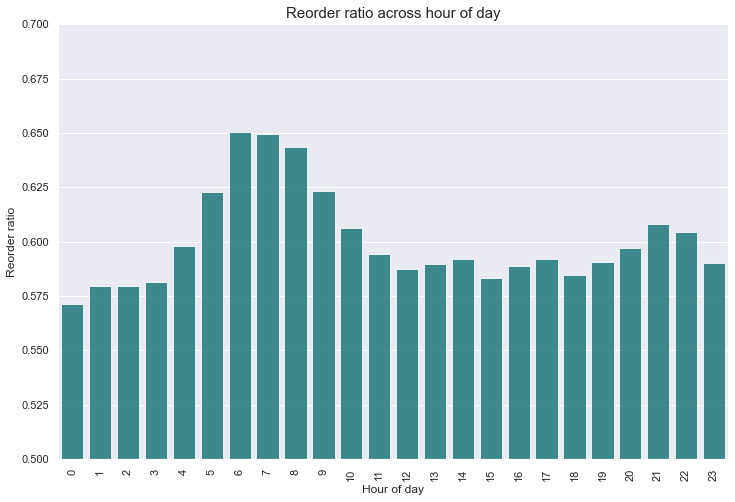

In [46]:
grouped_df = order_product_train.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='#008080')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

#### Looks like reorder ratios are quite high during the early mornings compared to later half of the day.

# Modeling

In [47]:
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv('products.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')

In [48]:
train_merge = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
train_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [49]:
New_train_merge = pd.merge(train_merge, products_df, on='product_id', how='left')
New_train_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15


In [50]:
New_train_df = pd.merge(New_train_merge, departments_df, on='department_id', how='left')
New_train_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [51]:
Copy_train_df = New_train_df.copy()

In [52]:
del New_train_df['eval_set']
del New_train_df['add_to_cart_order']
New_train_df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [53]:
orders_new=orders_df[orders['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [54]:
New_train_df['average_days_between_orders'] = orders_new.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
New_train_df['average_days_between_orders'] = New_train_df['average_days_between_orders'].replace(np.nan, 0)

In [55]:
New_train_df['average_days_between_orders'] = New_train_df['average_days_between_orders'].replace(0, 1)

In [56]:
#number of orders as a feature using the orders_new dataset
New_train_df['nb_orders'] = orders_new.groupby('user_id').size().astype(np.int16)
New_train_df['nb_orders'] = New_train_df['nb_orders'].replace(np.nan, 0)

In [57]:
#Getting the total items using the entire dataset 
New_train_df['total_items'] = New_train_merge.groupby('user_id').size().astype(np.int16)
New_train_df['total_items'] = New_train_df['total_items'].replace(np.nan, 0)

In [58]:
New_train_df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0


In [59]:
#getting average basket as a feature by using total items and number of orders
New_train_df['average_basket'] = (New_train_df.total_items /New_train_df.nb_orders).astype(np.float32)
New_train_df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,NaN
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000


In [60]:
New_train_df['average_basket'] = New_train_df['average_basket'].replace(np.nan, 0)

In [61]:
New_train_df['days_since_ratio'] = New_train_df.days_since_prior_order / New_train_df.average_days_between_orders
New_train_df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412


In [62]:
del New_train_df['user_id']
del New_train_df['product_name']
del New_train_df['department']
New_train_df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412


In [63]:
hour = {c:i for i,c in enumerate(New_train_df['order_hour_of_day'].unique())}
aisle_df = {c:i for i,c in enumerate(New_train_df['aisle_id'].unique())}
departments_df = {c:i for i,c in enumerate(New_train_df['department_id'].unique())}
product_df = {c:i for i,c in enumerate(New_train_df['product_id'].unique())}

In [64]:
New_train_df['aisle_new'] = [float(aisle_df[t]) for t in New_train_df.aisle_id]
New_train_df['dept_new'] = [float(departments_df[t]) for t in New_train_df.department_id]
New_train_df['product_new'] = [float(product_df[t]) for t in New_train_df.product_id]
New_train_df['order_hour_of_day_new'] = [float(hour[t]) for t in New_train_df.order_hour_of_day]
New_train_df['order_hour_of_day_new'].value_counts()

5.0     119370
11.0    116198
6.0     114762
15.0    114119
8.0     111752
0.0     110479
2.0     110237
9.0      96944
10.0     93856
1.0      76522
4.0      67386
13.0     58175
3.0      40920
12.0     36302
7.0      34813
16.0     27319
17.0     16965
14.0     11847
18.0      9083
20.0      5626
22.0      3847
21.0      3226
23.0      2438
19.0      2431
Name: order_hour_of_day_new, dtype: int64

In [65]:
New_train_df.shape

(1384617, 18)

In [66]:
Ord_dow = {c:i for i,c in enumerate(New_train_df['order_dow'].unique())}
New_train_df['order_dow_new'] = [float(Ord_dow[t]) for t in New_train_df.order_dow]
days_prior_odr = {c:i for i,c in enumerate(New_train_df['days_since_prior_order'].unique())}
New_train_df['days_since_prior_order__new'] = [float(days_prior_odr[t]) for t in New_train_df.days_since_prior_order]
New_train_df['reordered'] = New_train_df['reordered'].astype('float')
New_train_df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [67]:
New_train_df.shape

(1384617, 20)

In [68]:
del New_train_df['order_hour_of_day']
del New_train_df['order_dow']
del New_train_df['days_since_prior_order']
del New_train_df['product_id']
New_train_df.head()

,order_id,reordered,order_number,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,1.0,4,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,4,108,16,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.0,4,83,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,0.0,4,83,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,1.0,4,95,15,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [70]:
del New_train_df['aisle_id']
del New_train_df['department_id']

In [71]:
New_train_df.shape

(1384617, 14)

In [73]:
#Variable to be predicted
y=New_train_df['reordered']

In [74]:
del New_train_df['reordered']

In [75]:
New_train_df.head()

,order_id,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [76]:
New_train_df.shape

(1384617, 13)

## Using Logistic Regression for Classification

In [77]:
from sklearn.model_selection import train_test_split

In [102]:
#Perform 70/30 Data Split
#Xtr is the 70 while Ytr is the 30
#Xtest and Ytest will have the class labels 
Xtr, Xtest, ytr, ytest = train_test_split(New_train_df, y, test_size=0.30, random_state=5)

In [100]:
#Data Dimension for actual and predict data
Xtr.shape, ytr.shape

((969231, 13), (415386, 13))

In [101]:
Xtest.shape, ytest.shape

((415386, 13), (415386,))

In [80]:
#Change into 1-D array
ytr=ytr.ravel()

In [82]:
ytest=ytest.ravel()

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [84]:
#Logistic Regression model
clf=(LogisticRegression(C=0.02))

In [85]:
#Fitting the model
clf.fit(Xtr, ytr)

LogisticRegression(C=0.02)

In [89]:
#Probability for each row in the test set to be reordered
proba=clf.predict_proba(Xtest)[:,1]

array([0.58869357, 0.53510578, 0.55358493, ..., 0.52010477, 0.49101207,
       0.69408957])

In [90]:
#Set threshold
threshold = 0.5

In [110]:
#Prints True and False of whether the probability passed the threshold of 0.5 that we set
clf.predict_proba(Xtest)[:,1]> threshold

array([ True,  True,  True, ...,  True, False,  True])

In [93]:
#Prints a 1 if the chance to reorder is greater than 0.5
(clf.predict_proba(Xtest)[:,1] > threshold).astype(int)

array([1, 1, 1, ..., 1, 0, 1])

In [88]:
#Accuracy is the proportion of correct predictions over total predictions
#Accuracy score of Logistic Regression Model:
print(accuracy_score(clf.predict(Xtest), ytest))

0.59711930589861


In [105]:
#To cross-validate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, Xtest, ytest, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.59844965 0.59551265 0.5970293  0.59558487 0.59698115 0.59775151
 0.5995474  0.59726034 0.59730849 0.59579181]


In [106]:
#The range of how our scores are doing:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5955126507619346, 0.5971217167193144, 0.599547402378545)

In [ ]:
#So the range of our accuracy is between 0.5955 to 0.5995 but generally 0.5971 on average